<a href="https://colab.research.google.com/github/MagomedNalgiev/Google-Colab/blob/main/ML_learn_Toronto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
X_train, X_test = X_train / 255.0, X_test / 255.0


In [4]:
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


In [5]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [7]:
history = model.fit(X_train, y_train, epochs=10,
                    batch_size=64,
                    validation_data=(X_test, y_test))


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 84ms/step - accuracy: 0.3293 - loss: 1.8017 - val_accuracy: 0.5316 - val_loss: 1.2971
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 86ms/step - accuracy: 0.5504 - loss: 1.2522 - val_accuracy: 0.6088 - val_loss: 1.1115
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 84ms/step - accuracy: 0.6167 - loss: 1.0906 - val_accuracy: 0.6456 - val_loss: 1.0010
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 87ms/step - accuracy: 0.6576 - loss: 0.9721 - val_accuracy: 0.6684 - val_loss: 0.9421
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 86ms/step - accuracy: 0.6948 - loss: 0.8818 - val_accuracy: 0.6668 - val_loss: 0.9598
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 86ms/step - accuracy: 0.7117 - loss: 0.8256 - val_accuracy: 0.6856 - val_loss: 0.8920
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 82ms/step - accuracy: 0.7285 - loss: 0.7823 - val_accuracy: 0.6865 - val_loss: 0.9084
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 83ms/step - accuracy: 0.7392 - loss: 0.7367 - 

In [8]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.2f}")


313/313 - 5s - 16ms/step - accuracy: 0.7110 - loss: 0.8468
Test accuracy: 0.71


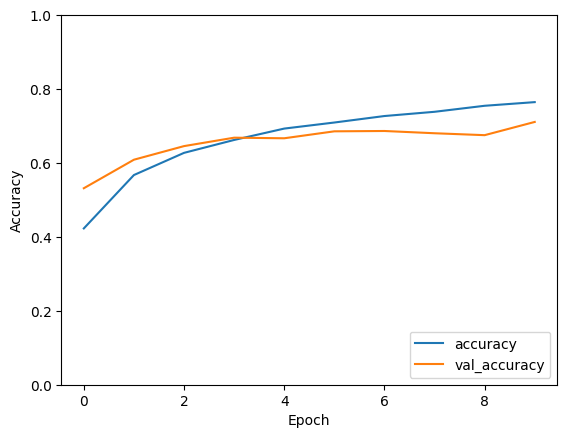

In [9]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()